# dNTP Frequency Charts for Figure 1
Also, for supplementary figure S2 (Aitchison distance instead of frequency)
## Import Modules

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from scipy.stats import ttest_ind

from turtles.turtles_utils import *

## Set Filepaths

In [2]:
#: Signal names
signals = ['Ca', 'Co', 'Zn', 'Temp']

#: Overall directory for TdT project data and analysis
tdt_dir = '/mnt/c/Users/jonst/Box Sync/All_dNTP_Data/Data_and_Results/'

#: Subdirectories of NGS runs
data_dir = {}
data_dir['Ca'] = tdt_dir + 'All_Data_Filtered_Trimmed/Ca_Controls/'
data_dir['Co'] = tdt_dir + 'All_Data_Filtered_Trimmed/Co_01_paired_simple_cut/'
data_dir['Zn'] = tdt_dir + 'All_Data_Filtered_Trimmed/Zn_Controls/'
data_dir['Temp'] = tdt_dir + 'All_Data_Filtered_Trimmed/Temp_101_gt0/'

#: Filename prefixes for 0 control conditions (Zn is mislabeled)
zero_control_conds = {}
zero_control_conds['Ca'] = ['NB_1MgTdTEnd-157462365',
                            'NB_2MgTdTEnd-157471352',
                            'NB_3MgTdTEnd-157460349',
                            'NB_4MgTdTEnd-157478337',
                            'NB_5MgTdTEnd-157474355',
                            'NB_6MgTdTEnd-157471356',
                            'NB_7MgTdTEnd-157469351']
zero_control_conds['Co'] = ['Namita_23630_Mg_Col_T0_1-167005853',
                            'Namita_23630_Mg_Col_T0_2-166999859',
                            'Namita_23630_Mg_Col_T0_3-167009845']
zero_control_conds['Zn'] = ['24755_Mg_2-215601402',
                            '24755_Mg_3-215601397',
                            '24755_ZnAc_1-215601398']
zero_control_conds['Temp'] = ['A4-FLD0289-37-1hr-1-242370305',
                              'A4-FLD0290-37-1h-2-242367356',
                              'A4-FLD0291-37-1hr-3-242383179']

#: Filename prefixes for 1 control conditions (Zn is mislabeled)
one_control_conds = {}
one_control_conds['Ca'] = ['NB_1CaTdTEnd-157464345',
                           'NB_2CaTdTEnd-157461337',
                           'NB_3CaTdTEnd-157467349',
                           'NB_4CaTdTEnd-157478336',
                           'NB_5CaTdTEnd-157471355',
                           'NB_6CaTdTEnd-157466351',
                           'NB_7CaTdTEnd-157467351']
one_control_conds['Co'] = ['Namita_23630_Cobalt_Col_T0_1-167010847',
                           'Namita_23630_Cobalt_Col_T0_2-166993853',
                           'Namita_23630_Cobalt_Col_T0_3-166999858']
one_control_conds['Zn'] = ['24755_ZnAc_2-215601399',
                           '24755_ZnAc_3-215601401',
                           '24755_No_TdT-215601400']
one_control_conds['Temp'] = ['A4-FLD0301-20-1hr-1-242375258',
                             'A4-FLD0302-20-1hr-2-242372261',
                             'A4-FLD0303-20-1hr-3-242369283']

#: suffix of R1 fastq file to read in each directory
filename_end = 'trimmed.fq'

#: Directory to save generated figures in - it gets created if not present already
figure_dir = tdt_dir + '/%dNTP_Charts/'
os.makedirs(os.path.dirname(figure_dir), exist_ok=True)

## Load Sequences and Calculate Base Frequency

In [ ]:
pcts_dict = {}
for signal in signals:
    cond_text = zero_control_conds[signal] + one_control_conds[signal]
    seqs_dict = read_seqs(data_dir[signal], filename_end=filename_end, cutoff=5.8,
                          cond_text=cond_text)
    pcts_dict[signal] = get_total_base_pcts(seqs_dict)

Loading NB_1CaTdTEnd-157464345
Read 841185 sequences...

Loading NB_1MgTdTEnd-157462365
Read 795971 sequences...

Loading NB_2CaTdTEnd-157461337
Read 815608 sequences...

Loading NB_2MgTdTEnd-157471352
Read 843687 sequences...

Loading NB_3CaTdTEnd-157467349
Read 861134 sequences...

Loading NB_3MgTdTEnd-157460349
Read 831850 sequences...

Loading NB_4CaTdTEnd-157478336
Read 839897 sequences...

Loading NB_4MgTdTEnd-157478337
Read 824431 sequences...

Loading NB_5CaTdTEnd-157471355
Read 788042 sequences...

Loading NB_5MgTdTEnd-157474355


## Choose Legend Labels for Plotting
Basically, here I create a dict (condition_dict) to map messy filenames to more readable descriptions. I do this based on text in the filename (condition).

In [ ]:
condition_dict = {signal: {} for signal in signals}

# Ca
for condition in pcts_dict['Ca']:
    if 'CaTdTEnd' in condition:
        condition_dict['Ca'][condition] = 'Mg+Ca Control'
    elif 'MgTdTEnd' in condition:
        condition_dict['Ca'][condition] = 'Mg Control (Ca)'
    else:
        print('Error: {} not recognized'.format(condition))

# Co
for condition in pcts_dict['Co']:
    if 'Cobalt_Col_T0' in condition:
        condition_dict['Co'][condition] = 'Mg+Co Control'
    elif 'Mg_Col_T0' in condition:
        condition_dict['Co'][condition] = 'Mg Control (Co)'
    else:
        print('Error: {} not recognized'.format(condition))

# Zn
for condition in pcts_dict['Zn']:
    if '_ZnAc_2' in condition or '_ZnAc_3' in condition or '_No_TdT' in condition:
        condition_dict['Zn'][condition] = 'Mg+Zn Control'
    elif '_Mg_2' in condition or '_Mg_3' in condition or '_ZnAc_1' in condition:
        condition_dict['Zn'][condition] = 'Mg Control (Zn)'
    else:
        print('Error: {} not recognized'.format(condition))

# Temp
for condition in pcts_dict['Temp']:
    if '37-1h' in condition:
        condition_dict['Temp'][condition] = '37C Control'
    elif '20-1hr' in condition:
        condition_dict['Temp'][condition] = '20C Control'
    else:
        print('Error: {} not recognized'.format(condition))

## Plot dNTP Frequency for Each Condition
### Choose colors

In [ ]:
sns.set(style='white', font='times-new-roman', font_scale=3, rc={'lines.linewidth': 5})
color_palette = sns.color_palette([[76/255, 114/255, 176/255, 1],
                                   [85/255, 168/255, 104/255, 1],
                                   [199/255, 87/255, 91/255, 1],
                                   [129/255, 114/255, 178/255, 1]],
                                  n_colors=4)
sns.palplot(color_palette)

### Calculate bar height and error values

In [ ]:
bases = ['A', 'C', 'G', 'T']

heights = {signal: [] for signal in signals}
yerr = {signal: [] for signal in signals}

for signal in signals:

    group0 = {base: [] for base in bases}
    group1 = {base: [] for base in bases}

    for condition in pcts_dict[signal]:
        for base in bases:
            if condition in zero_control_conds[signal]:
                group0[base].append(pcts_dict[signal][condition][base])
            elif condition in one_control_conds[signal]:
                group1[base].append(pcts_dict[signal][condition][base])

    for base in bases:

        mean0 = np.mean(group0[base])
        std0 = np.std(group0[base])

        mean1 = np.mean(group1[base])
        std1 = np.std(group1[base])
        
        diff = mean1 - mean0
        std = np.sqrt(std0 ** 2 + std1 ** 2)
        
        # heights and yerr values are in same order as bases
        heights[signal].append(diff)
        yerr[signal].append(std * 2)

### Plot bar charts for dNTP frequency
Note: in paper, the first two plots were switched to make Co first, since in the paper we mostly focus on Co.

In [ ]:
heights

In [ ]:
fig, axmatrix = plt.subplots(ncols=4, figsize=(30, 8), sharey=True)

for i, signal in enumerate(signals):
    ax = axmatrix[i]
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelleft=True, left=True, bottom=True)

    ax.bar(x=['A', 'C', 'G', 'T'], height=heights[signal], yerr=yerr[signal], color=color_palette)
    
    ax.set_ylim(-.1, .15)
    ax.set_yticks(np.arange(-.10, 0.151, .05))
    
    if signal == 'Temp':
        ax.set_title('0: 37' + r'$\degree$' + 'C    1: 20' + r'$\degree$' + 'C', fontsize=44,
                     pad=40)
    else:
        ax.set_title('0: Mg    1: Mg+{}'.format(signal), fontsize=40, pad=40)
        
    ax.axhline(0, c='.7', ls='--')

fig.tight_layout()
fig.savefig(figure_dir + 'dNTP_incorporation_barchart_Summary_Final', bbox_inches='tight')
fig.savefig(figure_dir + 'dNTP_incorporation_barchart_Summary_Final.svg', bbox_inches='tight')

## Replot in Aitchison Space
Supplemental Figure 2
### Transform Percents into Aitchison Space

In [ ]:
pcts_dict[signal]

In [ ]:
from turtles.turtles_utils import calc_aitchison_distance
clr_data = {}
for signal in signals:
    clr_data[signal] = calc_aitchison_distance(pcts_dict[signal])

### Calculate bar height and error values
Also, do t-test to test for significance between 0 and 1 conditions

In [48]:
bases = ['A', 'C', 'G', 'T']

heights = {signal: [] for signal in signals}
yerr = {signal: [] for signal in signals}

pvals = {}

for signal in signals:

    group0 = {base: [] for base in bases}
    group1 = {base: [] for base in bases}
    pvals[signal] = []

    for condition in condition_dict[signal]:
        for base in bases:
            if condition in zero_control_conds[signal]:
                group0[base].append(clr_data[signal][condition][base])
            elif condition in one_control_conds[signal]:
                group1[base].append(clr_data[signal][condition][base])

    for base in bases:
        mean0 = np.mean(group0[base])
        std0 = np.std(group0[base])
        mean1 = np.mean(group1[base])
        std1 = np.std(group1[base])

        pvals[signal].append(ttest_ind(group0[base], group1[base])[1])

        diff = mean1 - mean0
        std = np.sqrt(std0 ** 2 + std1 ** 2)

        heights[signal].append(diff)
        yerr[signal].append(std * 2)

### Plot bar charts for Aitchison distance

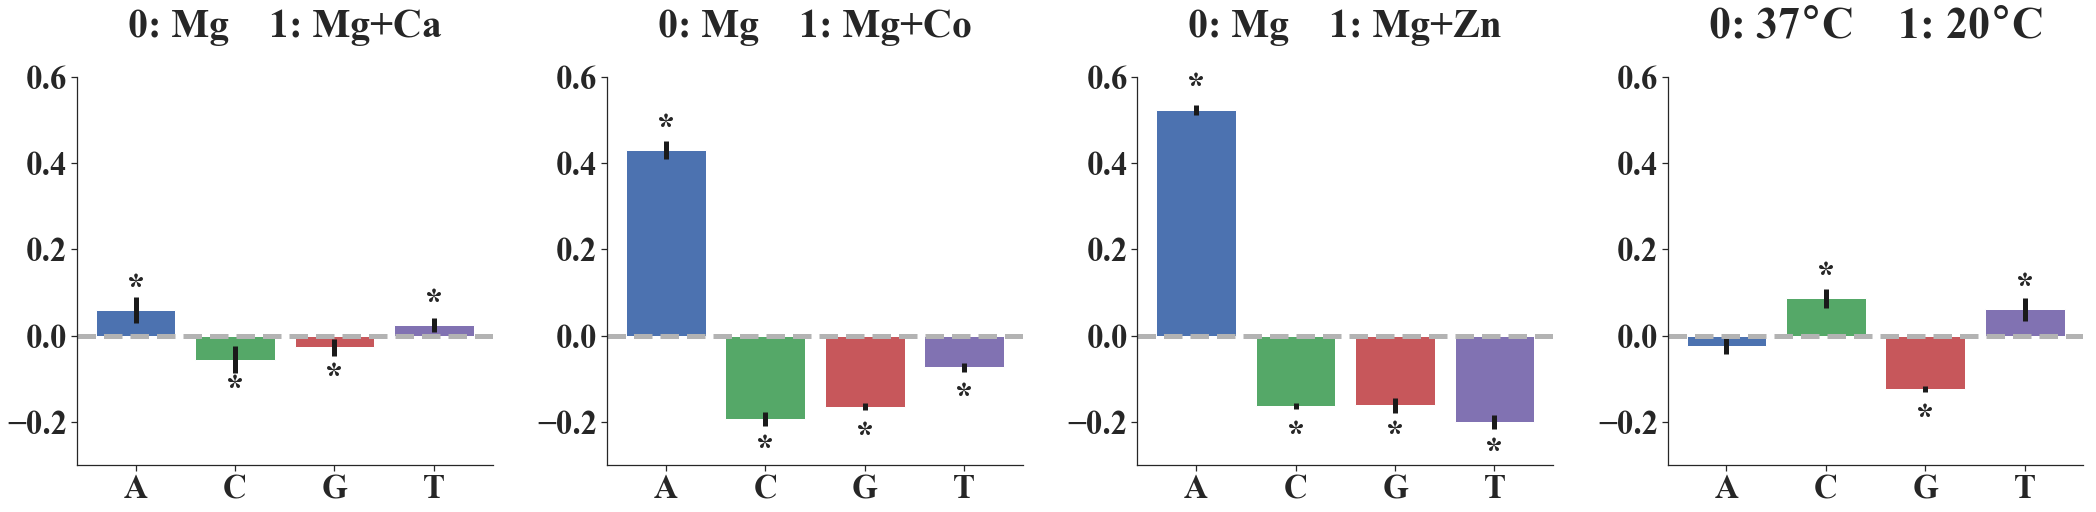

In [50]:
fig, axmatrix = plt.subplots(ncols=4, figsize=(30, 8), sharey=True)
alpha = 0.01

for i, signal in enumerate(signals):
    ax = axmatrix[i]
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelleft=True, left=True, bottom=True)

    ax.bar(x=['A', 'C', 'G', 'T'], height=heights[signal], yerr=yerr[signal], color=color_palette)
    
    if signal == 'Temp':
        ax.set_title('0: 37' + r'$\degree$' + 'C    1: 20' + r'$\degree$' + 'C', fontsize=44,
                     pad=40)
    else:
        ax.set_title('0: Mg    1: Mg+{}'.format(signal), fontsize=40, pad=40)
    
    ax.axhline(0, c='.7', ls='--')
    
    for i in range(len(bases)):
        if pvals[signal][i] < alpha:
            if heights[signal][i] > 0:
                ax.text(s='*', x=i, y=(heights[signal][i] + .03), ha='center')
            else:
                ax.text(s='*', x=i, y=(heights[signal][i] - .09), ha='center')
    
    ax.set_ylim(-.3, .6)
    
fig.tight_layout()
fig.savefig(figure_dir + 'dNTP_incorporation_transformed_barchart_Summary_Final', bbox_inches='tight')
fig.savefig(figure_dir + 'dNTP_incorporation_barchart_Summary_Final.svg', bbox_inches='tight')